In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib widget

# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [2]:
df = pd.read_csv('b1abb33c4f.csv')
df = df.loc[:,['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]
df['ESTCIVMAE'] = df['ESTCIVMAE'].map({
    1: 'Solteira',
    2: 'Casada',
    3: 'Viúva',
    4: 'Divorciada',
    5: 'Ignorado',
    9: 'Ignorado'
})
df['GESTACAO'] = df['GESTACAO'].map({
    'Menos de 22 semanas': '-22',
    '22 a 27 semanas': '22-27',
    '28 a 31 semanas': '28-31',
    '32 a 36 semanas': '32-36',
    '37 a 41 semanas': '37-41',
    '42 semanas e mais':'42+'
})

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<BarContainer object of 11 artists>

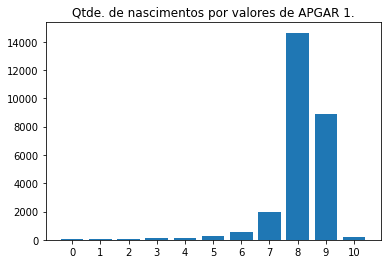

In [3]:
apgar1 = df['APGAR1'].value_counts().sort_index()
fig1, ax1 = plt.subplots()
ax1.set_xticks(np.arange(0, 11))
ax1.set_title('Qtde. de nascimentos por valores de APGAR 1.')
ax1.bar(apgar1.index, apgar1.values)
#fig1.show()

<BarContainer object of 11 artists>

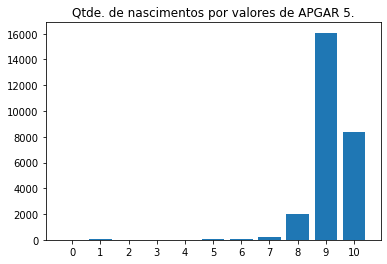

In [4]:
apgar5 = df['APGAR5'].value_counts().sort_index()
fig2, ax2 = plt.subplots()
ax2.set_xticks(np.arange(0, 11))
ax2.set_title('Qtde. de nascimentos por valores de APGAR 5.')
ax2.bar(apgar5.index, apgar5.values)

<BarContainer object of 6 artists>

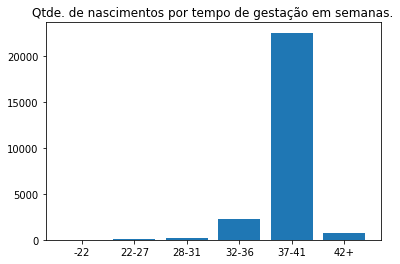

In [5]:
gest = df['GESTACAO'].value_counts().sort_index()
fig3, ax3 = plt.subplots()
ax3.set_title('Qtde. de nascimentos por tempo de gestação em semanas.')
ax3.bar(gest.index, gest.values)

<BarContainer object of 2 artists>

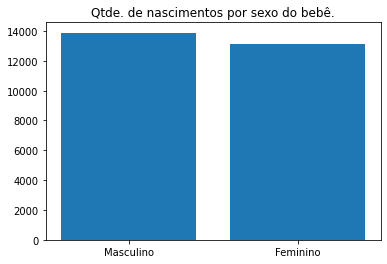

In [6]:
sexo = df['SEXO'].value_counts()
fig4, ax4 = plt.subplots()
ax4.set_title('Qtde. de nascimentos por sexo do bebê.')
ax4.bar(sexo.index, sexo.values)

<BarContainer object of 5 artists>

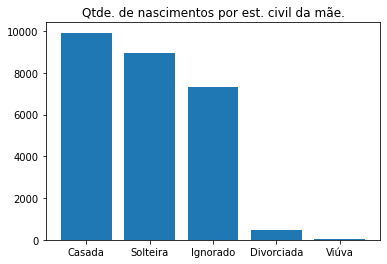

In [7]:
est_civ_mae = df['ESTCIVMAE'].value_counts()
fig5, ax5 = plt.subplots()
ax5.set_title('Qtde. de nascimentos por est. civil da mãe.')
ax5.bar(est_civ_mae.index, est_civ_mae.values)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [8]:
apgar_med = np.zeros(4)
apgar_med[0] = df[df['CONSULTAS'] == 1]['APGAR5'].mean()
apgar_med[1] = df[df['CONSULTAS'] == 2]['APGAR5'].mean()
apgar_med[2] = df[df['CONSULTAS'] == 3]['APGAR5'].mean()
apgar_med[3] = df[df['CONSULTAS'] == 4]['APGAR5'].mean()
apgar_med

array([8.98148148, 9.05739514, 9.15444015, 9.20718782])

<BarContainer object of 4 artists>

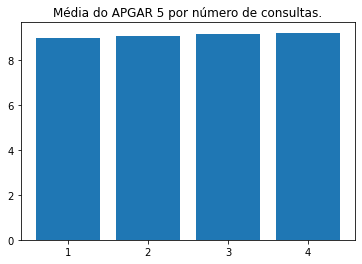

In [9]:
fig6, ax6 = plt.subplots()
ax6.set_title('Média do APGAR 5 por número de consultas.')
ax6.set_xticks(np.arange(1, 5))
ax6.bar(np.arange(1, 5), apgar_med)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<BarContainer object of 4 artists>

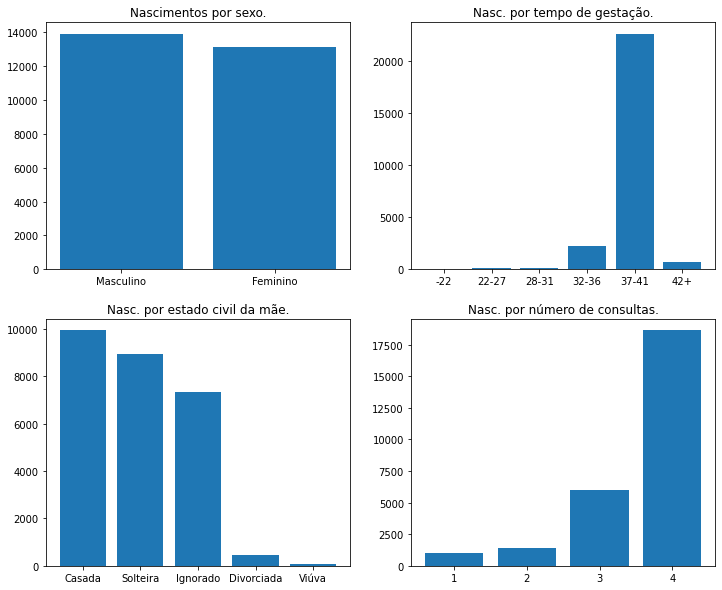

In [11]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12,10)

axs[0, 0].set_title('Nascimentos por sexo.')
axs[0, 0].bar(sexo.index, sexo.values)

axs[0, 1].set_title('Nasc. por tempo de gestação.')
axs[0, 1].bar(gest.index, gest.values)

axs[1, 0].set_title('Nasc. por estado civil da mãe.')
axs[1, 0].bar(est_civ_mae.index, est_civ_mae.values)

consultas = df['CONSULTAS'].value_counts().drop(9).sort_index()
axs[1, 1].set_title('Nasc. por número de consultas.')
axs[1, 1].set_xticks(np.arange(1, 5))
axs[1, 1].bar(consultas.index, consultas.values)